In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
data = pd.read_csv('data3a.csv')

In [3]:
data['f_int'] = (data['f'] == 'T').astype(int)

パラメータ数7の多項式回帰（ポアソン回帰）

「あてはまり」を改善したいのであれば、モデルをどんどん複雑にしていけば良い。

In [4]:
data['x^2'] = data['x']**2
data['x^3'] = data['x']**3
data['x^4'] = data['x']**4
data['x^5'] = data['x']**5
data['x^6'] = data['x']**6

In [5]:
data.x_c = sm.add_constant(data[['x','x^2','x^3','x^4','x^5','x^6']])

In [6]:
model = sm.GLM(data.y,data.x_c,family=sm.families.Poisson())
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       93
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -232.58
Date:                Sun, 22 Jan 2017   Deviance:                       79.387
Time:                        22:55:45   Pearson chi2:                     76.7
No. Iterations:                   100                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       8185.6246   7764.788      1.054      0.292     -7033.079  2.34e+04
x          -4980.3818   4833.716     -1.030      0.303     -1.45e+04  4493.528
x^2         1251.8054   1245.520      1.005      0.315     -1189.369  3692.980
x^3         -166.4112    170.083     -0.978      0.328      -499.768   166.945
x^4           12.3450     12.985      0.951      0.342       -13.105    37.795
x^5           -0.4847      0.526     -0.922      0.356        -1.515     0.545
x^6            0.0079      0.009      0.893      0.372        -0.009     0.025
==============================================================================
"""

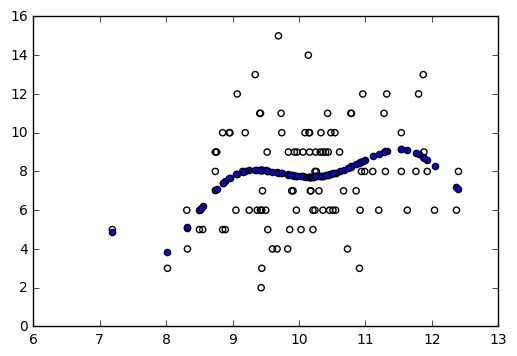

In [7]:
plt.scatter(data.x,data.y,facecolors='none')
plt.scatter(data.x,model.fit().predict(data.x_c),)
plt.show()

### データはひとつ、モデルはたくさん

- 一定モデル
- fモデル
- xモデル
- x+fモデル

一定モデル

In [8]:
model = sm.GLM(data.y,data.x_c['const'],family=sm.families.Poisson())
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -237.64
Date:                Thu, 19 Jan 2017   Deviance:                       89.507
Time:                        23:17:00   Pearson chi2:                     87.1
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.0580      0.036     57.586      0.000         1.988     2.128
==============================================================================
"""

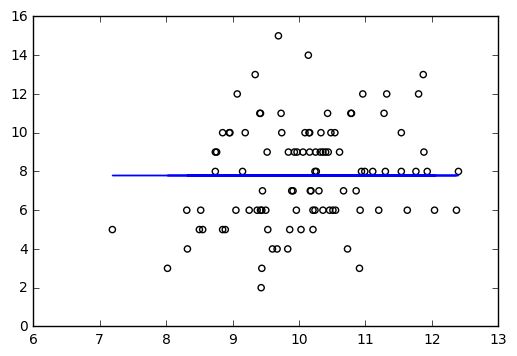

In [9]:
x=np.arange(min(data.x),max(data.x),1)
plt.scatter(data.x,data.y,facecolors='none')
plt.plot(data.x,model.fit().predict(data.x_c['const']),)
plt.show()

fモデル

In [10]:
data.x_c= sm.add_constant(data.f_int)
model = sm.GLM(data.y,data.x_c,family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -237.63
Date:                Thu, 19 Jan 2017   Deviance:                       89.475
Time:                        23:17:01   Pearson chi2:                     87.1
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.0516      0.051     40.463      0.000         1.952     2.151
f_int          0.0128      0.071      0.179      0.858        -0.127     0.153
==============================================================================
"""

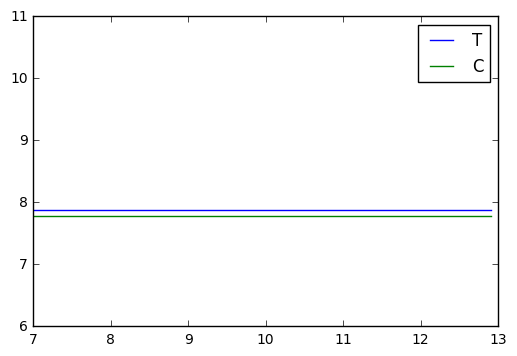

In [11]:
x = np.arange(7,13,0.1)
y = np.ones(x.shape)
plt.plot(x,y*np.exp(2.0516+0.0128),label='T')
plt.plot(x,y*np.exp(2.0516),label='C')
plt.ylim(6,11)
plt.legend()

xモデル

In [12]:
data.x_c = sm.add_constant(data.x)
model = sm.GLM(data.y,data.x_c,family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Thu, 19 Jan 2017   Deviance:                       84.993
Time:                        23:17:01   Pearson chi2:                     83.8
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.2917      0.364      3.552      0.000         0.579     2.005
x              0.0757      0.036      2.125      0.034         0.006     0.145
==============================================================================
"""

(6, 11)

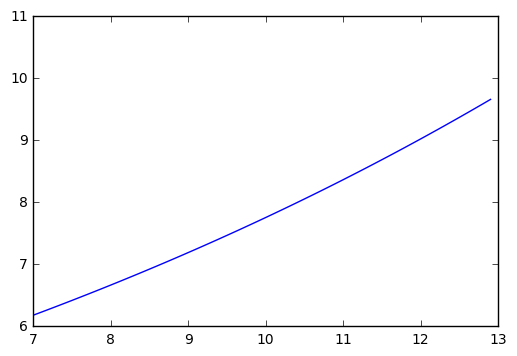

In [13]:
plt.plot(x,np.exp(1.2917+0.0757*x))
plt.ylim(6,11)

x+fモデル

In [14]:
data.x_c = sm.add_constant(data[['x','f_int']])
model = sm.GLM(data.y,data.x_c,sm.families.Poisson())
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -235.29
Date:                Thu, 19 Jan 2017   Deviance:                       84.808
Time:                        23:17:02   Pearson chi2:                     83.8
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.2631      0.370      3.417      0.001         0.539     1.988
x              0.0801      0.037      2.162      0.031         0.007     0.153
f_int         -0.0320      0.074     -0.430      0.667        -0.178     0.114
==============================================================================
"""

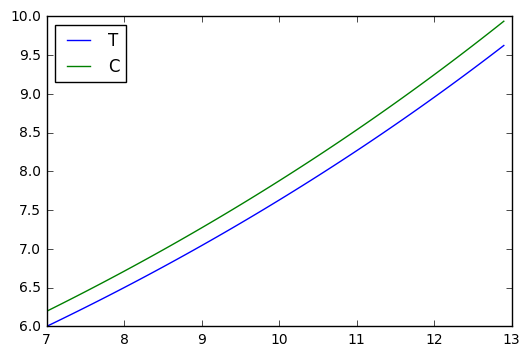

In [15]:
plt.plot(x,np.exp(1.2631+0.0801*x-0.032),label='T')
plt.plot(x,np.exp(1.2631+0.0801*x),label='C')
plt.legend(loc='upper left')

統計モデルのパラメータを推定した時に、対数尤度が「いま手元にある観測データへの当てはまりの良さ」であると考え、これを最大にするようなパラメータを探しました。この尤度から導かれれる当てはまりの良さが大きいほど良いモデルと言えるのではないか？

それがそうでもない。

### 逸脱度

逸脱度とは当てはまりの悪さを表現する指標で以下のように定義される。$logL^{*}$は最大対数尤度

$$D=-2logL^{*}$$



xモデルの逸脱度

xモデル:
$$\lambda = exp(1.2917+0.0757*x)$$

この数値はstatsmodelで出てこない。出てくるのはあとで説明する残渣逸脱度の方

In [16]:
#xモデルの最大対数尤度
max_loglikelihood_x = np.sum(stats.poisson.logpmf(data.y,np.exp(1.2917+0.0757*data.x)))
#xモデルの逸脱度
D = -2 * max_loglikelihood_x
print D

470.772607763


### 残渣逸脱度

残渣逸脱度は次式で表現される。$D-$（ポアソン分布モデルで可能な最小の逸脱度）
ポアソン分布モデルで可能な最小の逸脱度とはフルモデルと呼ばれるモデルで計算される。フルモデルとはデータが100こあれば、パラメータを100個使って当てはめたモデルのことをいう。

In [17]:
from scipy import stats
loglikewood_full = np.sum(np.log(stats.poisson.pmf(data.y,data.y))) #fullモデルの対数尤度
deviance = -2*loglikewood_full
print("対数尤度：%f") %loglikewood_full
print('最小の逸脱度:%f') %deviance

対数尤度：-192.889753
最小の逸脱度:385.779505


In [18]:
#xモデルの残渣逸脱度
residual_deviance_xmodel = D - deviance
print residual_deviance_xmodel

84.9931027138


このように、このケースにおいて残渣逸脱度とはとはフルモデルによる最小の逸脱度385.8を基準とする当てはまりの悪さの相対値である。

なお、最も当てはまりの悪いモデルをnullモデルと呼ぶ。このデータでポアソン回帰を利用する場合、nullモデルはパラメータが定数だけのモデルを指す。

### モデル選択基準AIC

赤池情報基準（AIC）が一番小さいモデルが良いモデルとされる。

AICは予測の良さを重視するモデル選択基準。別の言い方をすると汎化能力を重視するモデル選択基準である。

最尤推定したパラメータの個数がk個のときAICは以下の式

$AIC=-2${(最大対数尤度)-(最尤推定したパラメータ数)}

$=-2(logL^{*}-k)$

$=D+2k$

In [19]:
#結果を表にまとめる。
#フルモデル
log_likelihood = np.sum(stats.poisson.logpmf(data.y,data.y))
deviance = -2*log_likelihood
AIC = deviance + 2*100
sumarry = [[['full'],100,log_likelihood,deviance,0.,AIC]]

#一定モデル
data.x_c = sm.add_constant(data.x)
model = sm.GLM(data.y,data.x_c['const'],sm.families.Poisson())
result = model.fit()
sumarry.append([['const'],result.df_model+1,result.llf,-2*result.llf,result.deviance,result.aic])
import itertools
column = ['f_int','x']

#x,f,x+fモデル
for i in range(2):
    for a in itertools.combinations(column,i+1):
        a_array = a #モデル名
        data.x_c = sm.add_constant(data[list(a_array)])
        model = sm.GLM(data.y,data.x_c,sm.families.Poisson())
        res = model.fit()
        sumarry.append([list(a_array),res.df_model+1,res.llf,-2*res.llf,res.deviance,res.aic])
result_table = pd.DataFrame(sumarry,columns=['model','k','logL','deviance','residual deviance','AIC'])

In [20]:
result_table

,model,k,logL,deviance,residual deviance,AIC
0,[full],100,-192.889753,385.779505,0.000000,585.779505
1,[const],1,-237.643221,475.286443,89.506938,477.286443
2,[f_int],2,-237.627257,475.254514,89.475009,479.254514
3,[x],2,-235.386251,470.772502,84.992996,474.772502
4,"[f_int, x]",3,-235.293719,470.587438,84.807933,476.587438


### AICを説明するための別の問題

AICはなぜ統計モデルの予測力を表しているのか、その理由について考える。

In [21]:
#データ作成。yとxは関係ない
np.random.seed(2)
y = np.random.poisson(8,50)
x = np.random.uniform(-2,2,50)
data = pd.DataFrame(np.array([y,x]).T,columns=['y','x'])

In [22]:
#xmodel
data.x_c = sm.add_constant(data.x)
model = sm.GLM(data.y,data.x_c,sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   50
Model:                            GLM   Df Residuals:                       48
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -123.68
Date:                Thu, 19 Jan 2017   Deviance:                       54.666
Time:                        23:17:03   Pearson chi2:                     54.4
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.0754      0.051     40.708      0.000         1.975     2.175
x             -0.0417      0.046     -0.913      0.361        -0.131     0.048
==============================================================================
"""

In [23]:
result.aic

251.36653598406369

In [24]:
#一定モデル
model = sm.GLM(data.y,data.x_c['const'],sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   50
Model:                            GLM   Df Residuals:                       49
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -124.10
Date:                Thu, 19 Jan 2017   Deviance:                       55.497
Time:                        23:17:03   Pearson chi2:                     54.7
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.0669      0.050     41.078      0.000         1.968     2.165
==============================================================================
"""

In [25]:
result.aic

250.197522947187

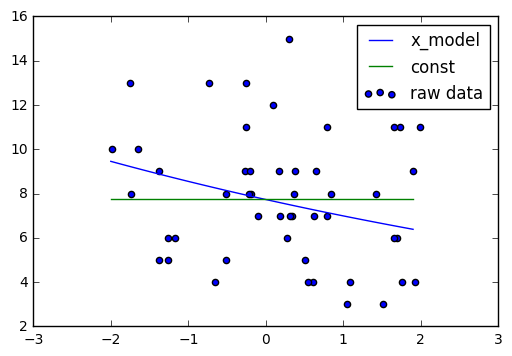

In [26]:
x = np.arange(-2.,2,0.1)
plt.scatter(data.x,data.y,label='raw data')
plt.plot(x,np.exp(-0.1006*x+2.0454),label='x_model')
plt.plot(x,np.exp(2.049)*np.ones(x.shape[0]),label='const')
plt.legend()

aicの値は一定モデルのほうが小さいが、これはたまたまそうゆう観測データが得られたと考える。

### 統計モデルの予測の良さ：平均対数尤度
平均対数尤度は統計モデルの予測の良さを表す量です。
予測の良さとは、次に同じデータ取得方法で別のデータを得た時に当該モデルはどれぐらいそれを正確に言い当てているかということ。

In [27]:
#推定モデルと真のモデルでの対数尤度を比較する。
x = np.arange(1.8,2.2,0.01)
loglikelihoods = np.array([np.sum(stats.poisson.logpmf(data.y,np.exp(i))) for i in x])

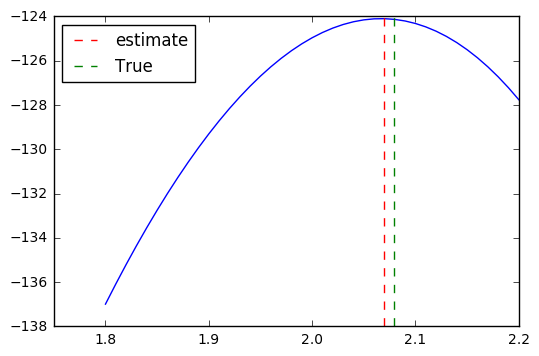

In [28]:
plt.plot(x,loglikelihoods)
plt.axvline(x[np.argmax(loglikelihoods)],c='r',ls='--',label='estimate')
plt.axvline(np.log(8),label='True',ls='--',c='g')
plt.legend(loc='upper left')

真の統計モデル（平均＝8）に200セットのデータを生成させ、これらの予測の良さ評価用のデータたちに対して、すでに推定された一定モデル（b1=2.0669）の当てはまりの良さを対数尤度で評価する。これらの200この大数尤度の平均が平均尤度であある。

### 最大対数尤度のバイアス補正
前記の最大尤度は-124.10である

In [29]:
#データの準備
test_data = np.random.poisson(8,[200,50])

In [30]:
test_data.shape

(200, 50)

In [31]:
llh_test = np.array([np.sum(stats.poisson.logpmf(y,np.exp(2.0669))) for y in test_data])

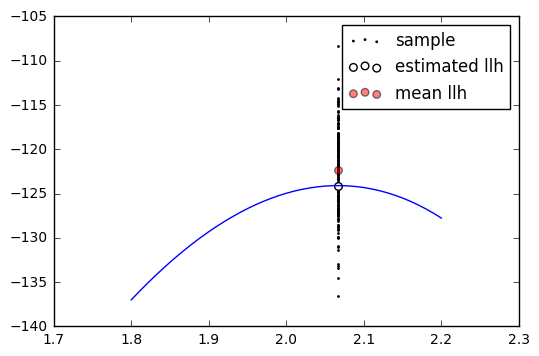

In [32]:
plt.plot(x,loglikelihoods)
plt.scatter(np.ones(llh_test.shape[0])*2.0669,llh_test,s=1,label='sample')
plt.scatter(2.0669,-124.1,facecolor='w',s=30,label='estimated llh')
plt.scatter(2.0669,np.mean(llh_test),s=30,c='r',alpha=0.5,label='mean llh')
plt.legend()

最大尤度は平均尤度よりも小さい。この場合、たまたま得られた観測データで推定されたモデルでは、当てはまりの良さが過小評価されています。
推定用データによってはこの逆になることもある。

estimateのサンプルを１２個用意して、それぞれに対して200個のサンプルセットから尤度を計算し、その平均値を計算する。

In [33]:
#観測データの生成
np.random.seed(2)
y_ob = np.random.poisson(8,[12,50])
x_ob = np.random.uniform(-2,2,[12,50])
const = np.ones(50)

#予測の良さ評価用のデータセットの生成
predict_data = np.random.poisson(8,[12,200,50])

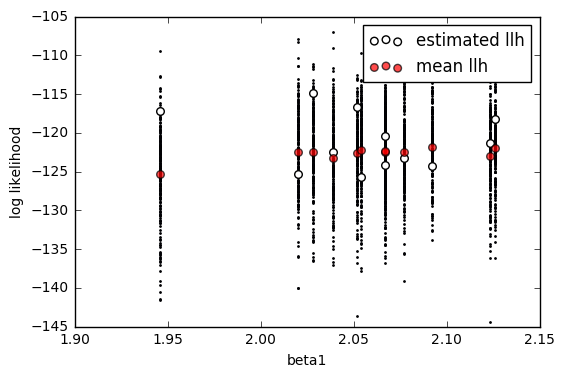

In [34]:
llh_ob = []
param_ob = []
llh_mean = []
for i in xrange(12):
    model = sm.GLM(y_ob[i],const,sm.families.Poisson())
    result = model.fit()
    
    llh_ob.append(result.llf)
    param_ob.append(result.params[0])
    
    llh_predict = np.array([np.sum(stats.poisson.logpmf(x,np.exp(result.params[0]))) for x in predict_data[i]])
    llh_mean.append(llh_predict.mean())
    plt.scatter(np.ones(llh_predict.shape[0])*result.params[0],llh_predict,s=1,c='b')
    
plt.scatter(param_ob,llh_ob,facecolor='w',s=30,label='estimated llh')
plt.scatter(param_ob,llh_mean,c='r',alpha=0.7,s=30,label='mean llh')
plt.xlabel('beta1')
plt.ylabel('log likelihood')
plt.ylim((-145,-105))
plt.legend()

最大対数尤度と平均対数尤度の差をバイアスと呼ぶ。
$$b=logL^{*}-E(logL)$$

バイアスとは何なのかを調べるためにバイアスの分布を作成する。

In [35]:
#観測データの生成
np.random.seed(2)
y_ob = np.random.poisson(8,[100,50])
x_ob = np.random.uniform(-2,2,[100,50])
const = np.ones(50)

#予測の良さ評価用のデータセットの生成
predict_data = np.random.poisson(8,[100,200,50])

In [36]:
llh_ob = []
llh_mean = []
for i in xrange(100):
    model = sm.GLM(y_ob[i],const,sm.families.Poisson())
    result = model.fit()
    
    llh_ob.append(result.llf)
    
    llh_predict = np.array([np.sum(stats.poisson.logpmf(x,np.exp(result.params[0]))) for x in predict_data[i]])
    llh_mean.append(llh_predict.mean())
bias = np.array(llh_ob) - np.array(llh_mean)

標本平均値1.045


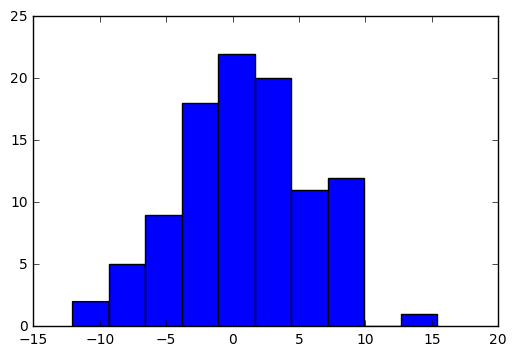

In [37]:
plt.hist(bias)
print('標本平均値%.3f'%bias.mean())

予測の良さを示す平均対数尤度より、推定用データへの当てはまりの良さである最大対数尤度のほうが、平均的に1ぐらい大きいということがわかった。

現実の統計モデルでは真の統計モデルがわからないので、平均対数尤度はわからない。

そこで、$E(LogL)=logL^{*}-b$と式変形すると平均的なbと最大対数尤度がわかれば平均対数尤度の推定量が得られそうである。これを、バイアス補正と呼ぶ。

数理統計学では最尤推定するパラメータをkこ持つモデルの平均対数尤度の推定量は$LogL^{*}-k$であることが導出されている。とすると上記の一定モデルではk=1なので
$E(logL)=logL^{*}-1$でこれに2をかけたものがAICとなる。

$$AIC=-2\times(logL^{*}-1)$$

平均対数尤度は統計モデルの予測の良さを示す指標だったので、AICは予測の悪さを示す指標と解釈できる。

### ネストしているGLM間のAIC比較

AICは予測の良さを表す平均対数尤度に基づく統計量であり、さらに平均対数尤度と最大対数尤度の平均的なずれはパラメータ数kと同じであると考えています。

バイアスb（ずれ）の平均値は1でしたが、ばらつきが大きように見えるので本当にこれを使っていいのか？

以下では、「ネストしている」モデルの比較については、bのばらつきが小さくなることを示す。

比較に使うモデルは一定モデルとxモデルである。使うデータでは、ｘとｙに全く関係がないのでAICはxモデルのがパラメータ数の分として2ぐらい悪くなるはずです。

In [38]:
#最大対数尤度の差の分布を見る
np.random.seed(3)
#データ作成
y_ob = np.random.poisson(8,(200,50))
x_ob = np.random.uniform(-2,2,(200,50))
x_c = np.ones(50)

In [39]:
llf_differences = []
for i in xrange(200):
    #一定モデル
    model = sm.GLM(y_ob[i],x_c,family=sm.families.Poisson())
    result = model.fit()
    llf_const = result.llf
    
    #xモデル
    model = sm.GLM(y_ob[i],np.array([x_ob[i],x_c]).T,family=sm.families.Poisson())
    result = model.fit()
    llf_x = result.llf
    
    llf_differences.append(llf_x - llf_const)
    

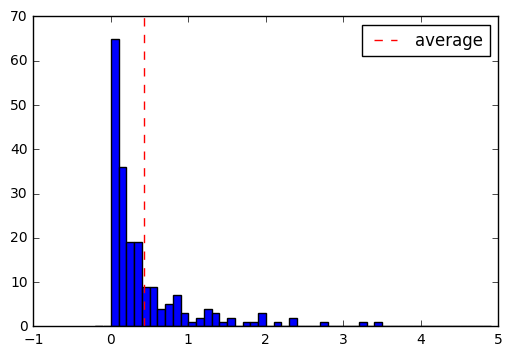

In [40]:
plt.hist(llf_differences,bins=np.arange(-0.2,5.0,0.1))
plt.axvline(np.mean(llf_differences),c='r',ls='--',label='average')
plt.legend(loc='upper right')

もともとxはyとはなんの関係もないが、xモデルのb1を上手に選ぶことで、当てはまりの良さの最大対数尤度は平均的に0.5改善される。

次に平均尤度の差の分布を見る

In [45]:
#平均尤度の差を見る
#観測データの用意
y_ob = np.random.poisson(8,[200,50])
x_ob = np.random.uniform(-2,2,[200,50])
const = np.ones(50)

#評価用のデータの生成
y_es = np.random.poisson(8,[200,200,50])
x_es = np.random.uniform(-2,2,[200,200,50])

In [94]:
mean_llhs_const = []
bias_const = []

mean_llhs_x = []
bias_x = []

for i in xrange(200):
    #一定モデルの平均対数尤度
    model = sm.GLM(y_ob[i],const,family=sm.families.Poisson())
    result = model.fit()
    param = result.params[0]

    llhs_const = np.array([np.sum(stats.poisson.logpmf(test,np.exp(param))) for test in y_es[i]])
    mean_llhs_const.append(llhs_const.mean())
    bias_const.append(result.llf - llhs_const.mean())
    
    #xモデルの平均対数尤度
    model = sm.GLM(y_ob[i],np.array([x_ob[i],const]).T,family=sm.families.Poisson())
    result = model.fit()
    beta1,beta2 = result.params
    
    llhs_x = np.array([np.sum(stats.poisson.logpmf(test_y,np.exp(beta1*test_x+beta2))) for test_y,test_x in zip(y_es[i],x_es[i])])
    mean_llhs_x.append(llhs_x.mean())
    bias_x.append(result.llf - llhs_x.mean())

In [95]:
difference_ave = np.array(mean_llhs_x) - np.array(mean_llhs_const)

-0.546853156357


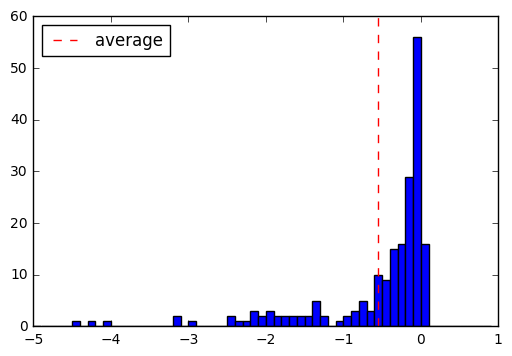

In [96]:
plt.hist(difference_ave,bins=np.arange(-5,1,0.1))
plt.axvline(difference_ave.mean(),ls='--',c='r',label='average')
plt.legend(loc='upper left')
print(difference_ave.mean())

パラメータ数の多いxモデルのほうが平均対数尤度が平均0.5低くなりました。推定すべきパラメータ数の増加によって予測が悪くなっている。

なお、バイアスの差は（最大対数尤度の差）ー（平均対数尤度の差）で計算されるため1.0くらいになる。

In [97]:
difference_bias = np.array(bias_x) - np.array(bias_const)

1.07690169722


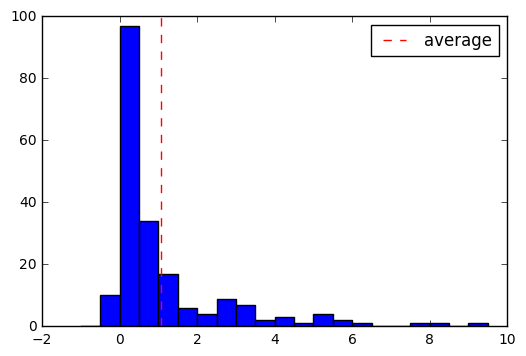

In [101]:
plt.hist(difference_bias,bins=np.arange(-1,10,0.5))
plt.axvline(difference_bias.mean(),ls='--',c='r',label='average')
plt.legend(loc='upper right')
print(difference_bias.mean())

前述の一定モデルにおけるバイアスの分布と比べるとバイアスの差の分布はばらつきが改善されている。

まとめると以下の通り。
- 当てはまりの良さである最大対数尤度はxモデルが一定モデルより0.5くらい高い
- 予測の力である平均対数尤度はxモデルが一定モデルより0.5くらい低い
- したがって、xモデルの最大対数尤度の平均バイアスは一定モデルと比較して1増加する。